In [1]:
import numpy as np
import pandas as pd

In [2]:
bu = pd.read_excel('D:/SOCIAL DATA/Dropbox/Python 4ta edición - Programa Completo/3. avanzado/sesión_01/datos/diabetes_py.xlsx')

In [3]:
bu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   clase     115 non-null    int64
 1   glucosa   115 non-null    int64
 2   insulina  115 non-null    int64
 3   sspg      115 non-null    int64
dtypes: int64(4)
memory usage: 3.7 KB


In [4]:
bu.head()

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


**Target: clase**

#clase 1 = normal
#clase 2 = pre-diabético
#clase 3 = diabético

**Particionamiento de los datos considerando 3 predictores**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=bu.iloc[:,1:4].values
y=bu.iloc[:,0].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y, random_state=2020)

**Particionamiento de los datos considerando 2 predictores**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x=bu.iloc[:,1:3].values
y=bu.iloc[:,0].values

In [10]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST= train_test_split(x,y,test_size=0.3, stratify=y, random_state=2020)

**Modelo de árbol**

In [11]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

In [12]:
tree = DecisionTreeClassifier(criterion="entropy",
                             min_samples_split=20,
                             max_depth=3,
                             random_state=2020)

**Validación cruzado**

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
score = cross_val_score(tree,X_TRAIN,Y_TRAIN,scoring="accuracy",cv=10)

In [15]:
score

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.85714286, 1.        , 1.        , 1.        ])

In [16]:
score.mean()

0.9857142857142858

**Continuamos con el modelo**

In [17]:
tree.fit(X_TRAIN, Y_TRAIN)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

In [18]:
x_combined= np.vstack((X_TRAIN, X_TEST))
y_combined= np.hstack((Y_TRAIN, Y_TEST))

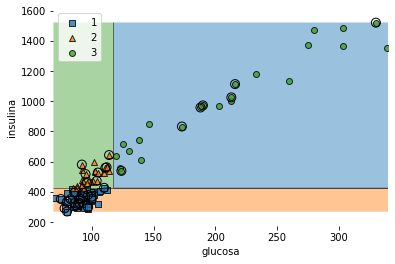

In [19]:
plot_decision_regions(x_combined,y_combined, clf=tree, X_highlight=X_TEST)
plt.legend(loc="upper left")
plt.xlabel("glucosa")
plt.ylabel("insulina")
plt.show()

In [20]:
tree.score(X_TRAIN, Y_TRAIN)

1.0

In [21]:
tree.score(X_TEST, Y_TEST)

0.9714285714285714

**Gráfica de árbol**

In [22]:
import graphviz
from sklearn.tree import export_graphviz
from subprocess import check_call

In [ ]:
x_train, x_test, y_train, y_test

In [23]:
x_t = pd.DataFrame(x_train, columns=["glucosa","insulina","sspg"])
y_t = pd.DataFrame(y_train, columns=["clase"])
bupa_entrenamiento = pd.concat([x_t,y_t],axis=1)
bupa_entrenamiento.head()

,glucosa,insulina,sspg,clase
0,93,306,220,1
1,339,1354,10,3
2,93,376,195,1
3,95,391,137,1
4,92,386,279,1


In [24]:
colnames = bupa_entrenamiento.columns.tolist()

In [25]:
colnames

['glucosa', 'insulina', 'sspg', 'clase']

In [26]:
predictores = colnames[0:3]

In [27]:
target = colnames[3]

In [28]:
predictores

['glucosa', 'insulina', 'sspg']

In [29]:
target

'clase'

In [30]:
tree=DecisionTreeClassifier(criterion="entropy", min_samples_split=20,max_depth=3,random_state=2020)

In [31]:
tree_fit = tree.fit(x_train,y_train)

In [32]:
import os

In [33]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [34]:
with open("bupa_dtree.dot","w") as dotfile:
    export_graphviz(tree_fit, out_file=dotfile,
                   feature_names=predictores)
    dotfile.close()

In [35]:
from graphviz import Source

In [36]:
os.environ["PATH"] += os.pathsep + "C:/Users/SOCIAL DATA/"

In [37]:
file = open("bupa_dtree.dot","r")

In [38]:
text = file.read()

In [39]:
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 420.5\\nentropy = 1.408\\nsamples = 80\\nvalue = [46, 18, 16]"] ;\n1 [label="entropy = 0.0\\nsamples = 46\\nvalue = [46, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="glucosa <= 117.0\\nentropy = 0.998\\nsamples = 34\\nvalue = [0, 18, 16]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 16\\nvalue = [0, 0, 16]"] ;\n2 -> 4 ;\n}'

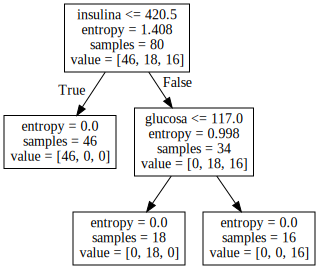

In [40]:
Source(text)

**Validación del modelo**

**accuracy**

In [41]:
tree.score(x_train,y_train)

1.0

In [42]:
tree.score(x_test,y_test)

0.9714285714285714

In [43]:
predict_entre = tree_fit.predict(x_train)

In [44]:
predict_entre

array([1, 3, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 2,
       2, 3, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 3, 1], dtype=int64)

**Binarizamos datos de entrenamiento y construímos matriz de confusión**

In [45]:
from sklearn.preprocessing import label_binarize

In [48]:
#binarizando el y real
y = label_binarize(y_train, classes=[1,2,3])

In [54]:
#binarizando el y predict
y_predict = tree.predict(x_train)
y_p = label_binarize(y_predict, classes=[1,2,3])

In [59]:
from sklearn.metrics import confusion_matrix
cm_train_1 = confusion_matrix(y[:,0],y_p[:,0])
cm_train_1 #matriz de confusión para pacientes sanos

array([[34,  0],
       [ 0, 46]], dtype=int64)

3

**Función para mostrar el área bajo la curva ROC para cada categoría - data de entrenamiento**

In [68]:
from sklearn.metrics import roc_curve, auc
n_class = y.shape[1]
fpr= dict()
tpr= dict()
roc_auc= dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y[:,i],y_p[:,i])
    roc_auc[i]=auc(fpr[i], tpr[i])

In [69]:
roc_auc

{0: 1.0, 1: 1.0, 2: 1.0}

**Binarizamos datos de testeo y construímos matriz de confusión**

In [70]:
#binarizando el y real
y = label_binarize(y_test, classes=[1,2,3])

In [71]:
#binarizando el y predict
y_predict_t = tree.predict(x_test)
y_p_t = label_binarize(y_predict_t, classes=[1,2,3])

In [72]:
from sklearn.metrics import confusion_matrix
cm_test_1 = confusion_matrix(y[:,0],y_p_t[:,0])
cm_test_1 #matriz de confusión para pacientes sanos

array([[15,  0],
       [ 1, 19]], dtype=int64)

**Función para mostrar el área bajo la curva ROC para cada categoría - data de testeo**

In [73]:
from sklearn.metrics import roc_curve, auc
n_class = y.shape[1]
fpr= dict()
tpr= dict()
roc_auc= dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y[:,i],y_p_t[:,i])
    roc_auc[i]=auc(fpr[i], tpr[i])

In [74]:
roc_auc

{0: 0.975, 1: 0.9814814814814815, 2: 1.0}